In [1]:
install.packages(c("glue","tidyverse","quanteda", 
    "quanteda.textstats", "quanteda.textplots", 
    "udpipe", "spacyr"))

In [2]:
options(width=75)

In [3]:
library(glue)
library(tidyverse)
# Tokenization
library(quanteda)
library(quanteda.textstats)
library(quanteda.textplots)
# Natural language processing
library(udpipe)
library(spacyr)

── Attaching packages ──────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse() masks glue::collapse()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()

Package version: 3.0.0
Unicode version: 10.0
ICU version: 60.2

Parallel computing: 8 of 8 threads used.

See https://quanteda.io for tutorials and examples.



In [4]:
texts = c(
    "The caged bird sings with a fearful trill", 
    "for the caged bird sings of freedom")
d = tokens(texts) %>% dfm()
# Inspect by converting to a (dense) matrix
convert(d, "matrix") 

,the,caged,bird,sings,with,a,fearful,trill,for,of,freedom
text1,1,1,1,1,1,1,1,1,0,0,0
text2,1,1,1,1,0,0,0,0,1,1,1


In [5]:
text = "I haven't seen John's derring-do"
tokens(text)

Tokens consisting of 1 document.
text1 :
[1] "I"          "haven't"    "seen"       "John's"     "derring-do"


In [6]:
haiku = "\u53e4\u6c60\u86d9
         \u98db\u3073\u8fbc\u3080
         \u6c34\u306e\u97f3"
tokens(haiku)

Tokens consisting of 1 document.
text1 :
[1] "古池"     "蛙"       "飛び込む" "水"       "の"       "音"      


In [7]:
url = "https://cssbook.net/d/sotu.csv"
sotu = read_csv(url) %>% 
       mutate(doc_id=paste(lubridate::year(Date), 
                           President, delivery))
d = corpus(sotu) %>% tokens() %>% dfm()
d


── Column specification ─────────────────────────────────────────────────────────────────────────────────
cols(
  FirstName = col_character(),
  President = col_character(),
  Date = col_date(format = ""),
  delivery = col_character(),
  type = col_character(),
  party = col_character(),
  text = col_character()
)




Document-feature matrix of: 85 documents, 18,165 features (91.07% sparse) and 6 docvars.
                        features
docs                      to  the congress  :  in considering state   of
  1945 Roosevelt written 247  642       14  6 236           1     5  376
  1945 Roosevelt spoken  110  238        8  3  90           0     1  137
  1946 Truman written    738 2141       74 17 669           4    24 1264
  1947 Truman spoken     227  473       27  7 132           1     5  292
  1948 Truman spoken     175  325       15  2  98           0     7  252
  1949 Truman spoken     139  239       17  2  69           1     1  150
                        features
docs                     union    ,
  1945 Roosevelt written     2  351
  1945 Roosevelt spoken      0  139
  1946 Truman written        8 1042
  1947 Truman spoken         7  236
  1948 Truman spoken         5  155
  1949 Truman spoken         1  148
[ reached max_ndoc ... 79 more documents, reached max_nfeat ... 18,155 more featur

In [8]:
textstat_frequency(d)[c(1, 10, 100, 1000, 15000)]

,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,the,34999,1,85,all
10,our,9334,10,85,all
100,first,750,100,83,all
1000,investments,76,988,34,all
15000,tobago,1,11005,1,all


In [9]:
as.matrix(d[
  c(3, 25, 50, 75),
  c("the","first","investment","defrauded")])

,the,first,investment,defrauded
1946 Truman written,2141,21,9,0
1965 Johnson spoken,283,14,0,0
1984 Reagan spoken,209,8,1,0
2009 Obama spoken,269,8,4,0


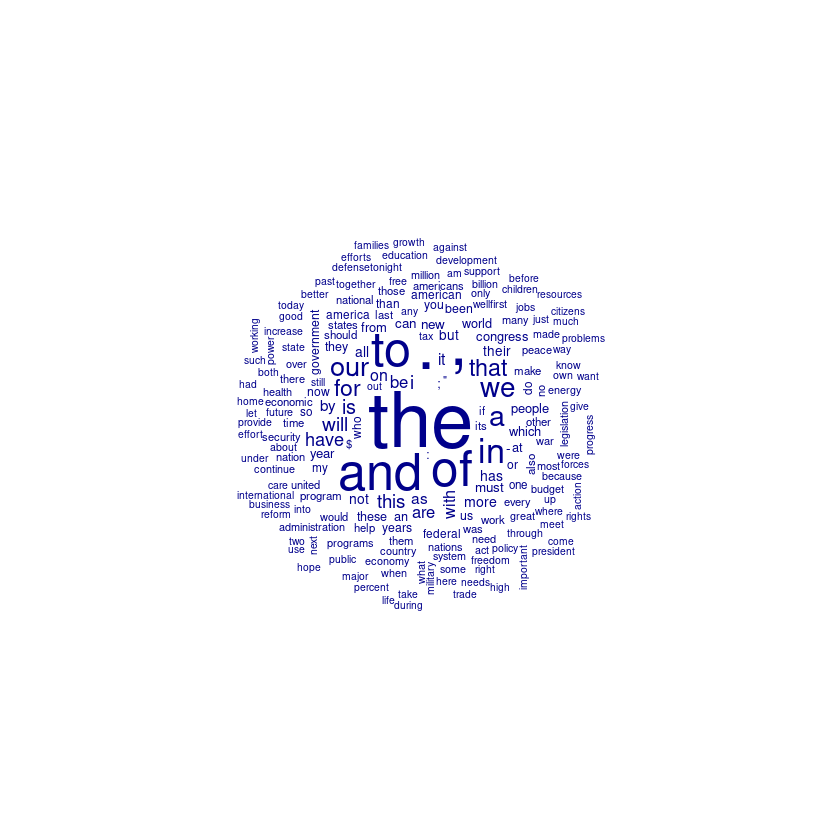

In [10]:
textplot_wordcloud(d, max_words=200)

In [11]:
url = "https://cssbook.net/d/trumptweets.csv"
tweets = read_csv(url, 
    col_types=cols_only(text="c", status_id="c")) 
head(tweets)

status_id,text
<chr>,<chr>
x1864367186,Read a great interview with Donald Trump that appeared in The New York Times Magazine: http://tinyurl.com/qsx4o6
x9273573134835712,"Congratulations to Evan Lysacek for being nominated SI sportsman of the year. He's a great guy, and he has my vote! #EvanForSI"
x29014512646,"I was on The View this morning. We talked about The Apprentice. Tonight's episode is a great one--tough, exciting and surprising. 10 pm/NBC"
x7483813542232064,Tomorrow night's episode of The Apprentice delivers excitement at QVC along with appearances by Isaac Mizrahi and Cathie Black. 10 pm on NBC
x5775731054,"Donald Trump Partners with TV1 on New Reality Series Entitled, Omarosa's Ultimate Merger: http://tinyurl.com/yk5m3lc"
x14785576859340800,"I'll be appearing on Larry King Live for his final show, Thursday night at 9 p.m., CNN. Larry's been on TV for 25 years..."


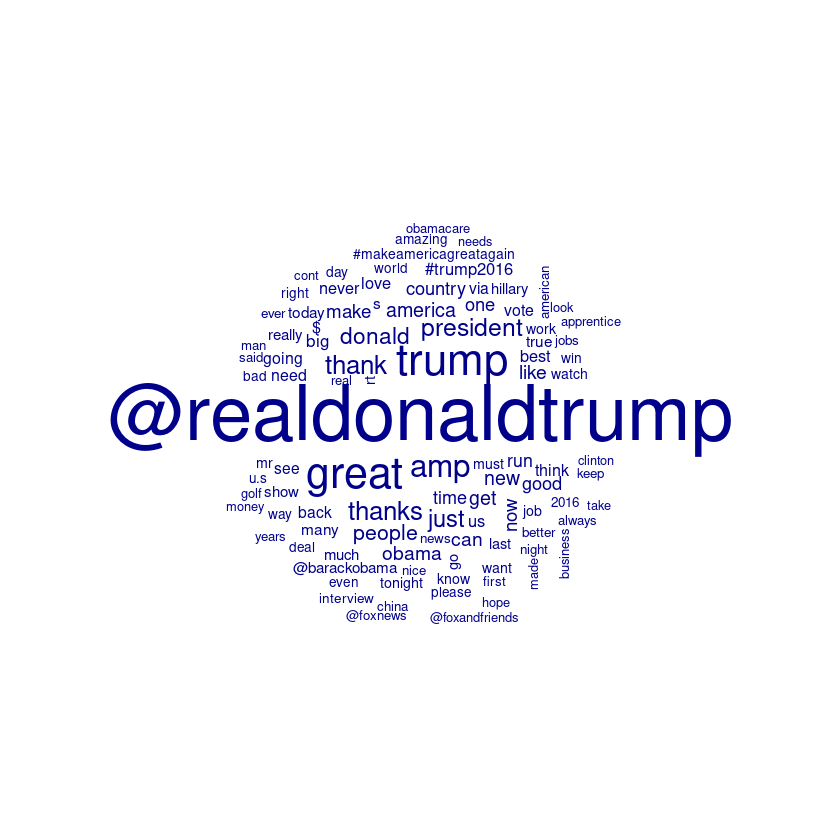

In [12]:
d = corpus(tweets) %>% 
  tokens(remove_punct=T) %>% 
  dfm() %>%
  dfm_remove(stopwords("english"))
textplot_wordcloud(d, max_words=100)



In [13]:
mystopwords = stopwords("english", 
                        source="snowball")
mystopwords = c("go", "one", mystopwords)
glue("Now {length(mystopwords)} stopwords:")
mystopwords[1:5]

Now 177 stopwords:

[1] "go"  "one" "i"   "me"  "my"

In [14]:
glue("# of words before trimming: {ncol(d)}")
d_trim = dfm_trim(d, min_docfreq = 0.005, 
                  max_docfreq = 0.75,
                  docfreq_type = "prop")
glue("# of word after trimming: {ncol(d_trim)}")


# of words before trimming: 44386

# of word after trimming: 301

In [15]:
d_tf = corpus(sotu) %>% 
  tokens() %>% 
  dfm() %>% 
  dfm_tfidf(scheme_tf="prop", smoothing=1)
as.matrix(
  d_tf[c(3, 25, 50, 75),
       c("the","first","investment","defrauded")])

,the,first,investment,defrauded
1946 Truman written,0.02084698,0.0002080106,1.103379e-04,0
1965 Johnson spoken,0.01746801,0.0008790725,0.000000e+00,0
1984 Reagan spoken,0.01132996,0.0004411759,6.825554e-05,0
2009 Obama spoken,0.01208793,0.0003657038,2.263162e-04,0


In [16]:
id="x263687274812813312"
single_tweet = tweets$text[tweets$status_id == id]
glue("Raw:\n{single_tweet}")
tweet_tokens = tokens(single_tweet)
glue("After tokenizing:")
paste(tweet_tokens, collapse=" ")

Raw:
Part 1 of my @jimmyfallon interview discussing my $5M offer to Obama, #TRUMP Tower atrium, my tweets &amp; 57th st. crane http://t.co/AvLO9Inf

After tokenizing:

[1] "Part 1 of my @jimmyfallon interview discussing my $ 5M offer to Obama , #TRUMP Tower atrium , my tweets & amp ; 57th st . crane http://t.co/AvLO9Inf"

In [17]:
single_tweet = single_tweet  %>% 
  str_remove_all("\\bhttps?://\\S*|&\\w+;")
tweet_tokens = tokens(single_tweet)
glue("After pre-processing:")
paste(tweet_tokens, collapse=" ")

After pre-processing:

[1] "Part 1 of my @jimmyfallon interview discussing my $ 5M offer to Obama , #TRUMP Tower atrium , my tweets 57th st . crane"

In [18]:
tweet_tokens = tweet_tokens %>%
  tokens_tolower()  %>% 
  tokens_remove(stopwords("english")) %>% 
  tokens_keep("^\\p{LETTER}", valuetype="regex")
print("After pruning tokens:")
paste(tweet_tokens, collapse=" | ")

[1] "After pruning tokens:"


[1] "part | interview | discussing | offer | obama | tower | atrium | tweets | st | crane"

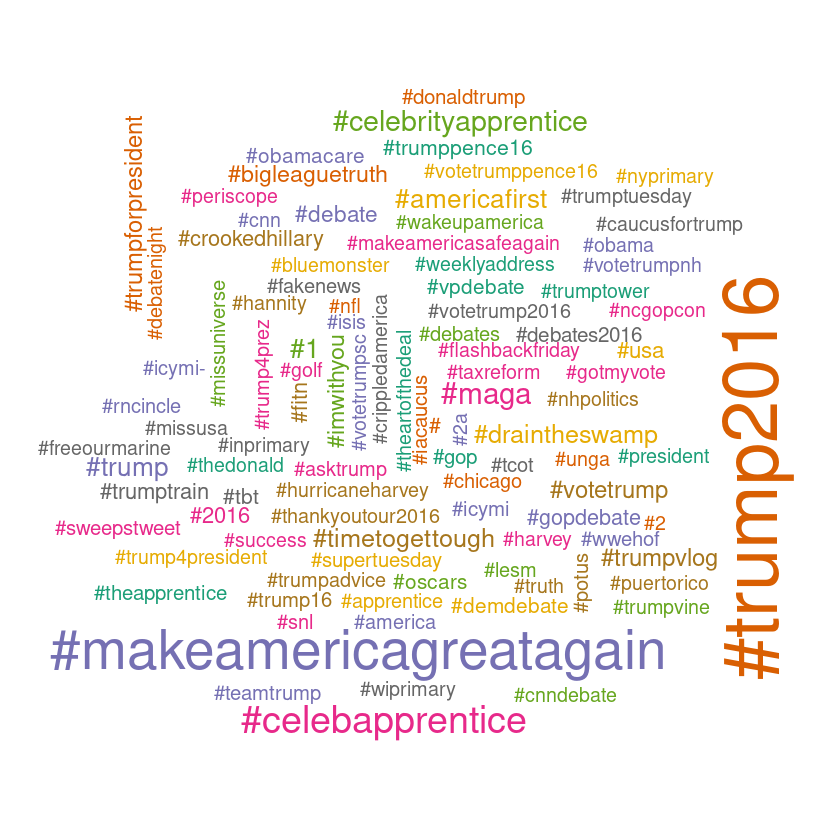

In [19]:
dfm_cleaned = tweets %>% 
  corpus() %>% 
  tokens()  %>% 
  tokens_keep("^#", valuetype="regex")  %>% 
  dfm()
colors = RColorBrewer::brewer.pal(8, "Dark2")
textplot_wordcloud(dfm_cleaned, max_words=100, 
    min_size = 1, max_size=4, random_order=TRUE,
    random_color= TRUE, color=colors)

In [20]:
glove_fn = "glove.6B.50d.10k.w2v.txt"
url = glue("https://cssbook.net/d/{glove_fn}")
if (!file.exists(glove_fn)) 
    download.file(url, glove_fn)

In [21]:
wv_tibble = read_delim(glove_fn, skip=1,
                       delim=" ", quote="", 
    col_names = c("word", paste0("d", 1:50)))
wv = as.matrix(wv_tibble[-1])
rownames(wv) = wv_tibble$word
wv = wv / sqrt(rowSums(wv^2))
wv[order(wv[,1])[1:5], 1:5]


── Column specification ─────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  word = col_character()
)
ℹ Use `spec()` for the full column specifications.




,d1,d2,d3,d4,d5
20003,-0.4402265,0.07209431,-0.02397687,0.18428984,0.001802660
basketball,-0.4234652,0.23817458,-0.09346347,0.17270343,-0.001520135
collegiate,-0.4232457,0.23873925,-0.28741579,0.02797958,-0.066008001
volleyball,-0.4217268,0.18378662,-0.26229465,0.31409226,-0.124286069
ncaa,-0.4131240,0.14502199,-0.06088206,0.17017979,-0.157397324


In [33]:
wvector = function(wv, word) wv[word,,drop=F]
wv_similar = function(wv, target, n=5) {
  similarities = wv %*% t(target)
  similarities %>% 
    as_tibble(rownames = "word") %>% 
    rename(similarity=2) %>% 
    arrange(-similarity) %>% 
    head(n=n)  
}
wv_similar(wv, wvector(wv, "fraud"))

word,similarity
<chr>,<dbl>
fraud,1.0000000
charges,0.8591152
bribery,0.8559850
alleged,0.8415063
corruption,0.8299386


In [23]:
wv_analogy = function(wv, a, b, c) {
  result = (wvector(wv, b) 
            + wvector(wv, c) 
            - wvector(wv, a))
  matches = wv_similar(wv, result) %>% 
    filter(!word %in% c(a,b,c))
  matches$word[1]
}
words=c("king","boy","father","pete","football")
for (x in words) {
  y = wv_analogy(wv, "man", x, "woman")
  print(glue("Man is to {x} as woman is to: {y}"))
}

Man is to king as woman is to: queen
Man is to boy as woman is to: girl
Man is to father as woman is to: mother
Man is to pete as woman is to: barbara
Man is to football as woman is to: soccer


In [24]:
text = "This is a test"
tokens(text) %>% 
  tokens_tolower() %>% 
  tokens_ngrams(1:3)

Tokens consisting of 1 document.
text1 :
[1] "this"      "is"        "a"         "test"      "this_is"   "is_a"     
[7] "a_test"    "this_is_a" "is_a_test"


In [25]:
sotu_tokens = corpus(sotu) %>% 
  tokens(remove_punct=T)  %>%  
  tokens_remove(stopwords("english")) %>% 
  tokens_tolower()
dfm_bigram = sotu_tokens %>% 
  tokens_ngrams(1:2) %>% 
  dfm()
textstat_frequency(dfm_bigram) %>% 
  filter(str_detect(feature, "government")) %>%
  head(12)

,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
10,government,1424,10,84,all
198,federal_government,265,198,56,all
319,governments,188,318,50,all
652,local_governments,104,648,28,all
980,government's,71,972,25,all
1212,government_must,55,1195,28,all
1455,government_can,44,1433,26,all
1539,governmental,41,1537,19,all
1956,local_government,32,1919,16,all


In [26]:
sotu_tokens = corpus(sotu)  %>% 
  tokens(remove_punct=T) %>% 
  tokens_tolower()

colloc = sotu_tokens %>% 
  textstat_collocations(min_count=10) %>% 
  as_tibble() 


colloc %>% arrange(-lambda)  %>% head()

collocation,count,count_nested,length,lambda,z
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
saddam hussein,26,0,2,15.24282,10.344950
iron curtain,11,0,2,15.17020,9.848551
al qaida,37,0,2,14.58446,10.123583
red tape,22,0,2,13.46975,15.143993
persian gulf,31,0,2,12.90333,18.512806
line-item veto,10,0,2,12.85070,8.813416


In [27]:
collocations = colloc  %>% 
  filter(lambda > 8)  %>%  
  pull(collocation)  %>%  
  phrase()
dfm = sotu_tokens %>% 
  tokens_compound(collocations) %>% 
  dfm()
textstat_frequency(dfm) %>% 
  filter(str_detect(feature, "hussein"))

,feature,frequency,rank,docfreq,group
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2186,saddam_hussein,26,2120,5,all
8529,hussein's,3,7341,2,all


In [28]:
udpipe("John bought new knives", "english") %>% 
  select(token_id:upos, head_token_id:dep_rel)

token_id,token,lemma,upos,head_token_id,dep_rel
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,John,John,PROPN,2,nsubj
2,bought,buy,VERB,0,root
3,new,new,ADJ,4,amod
4,knives,knife,NOUN,2,obj


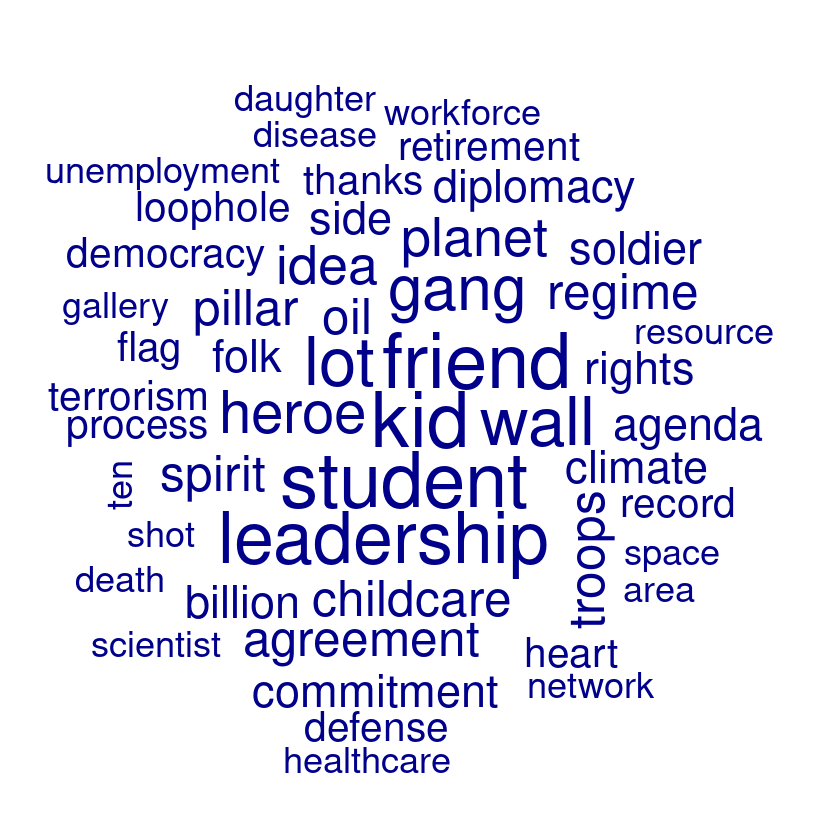

In [29]:
tokens = sotu %>% 
  top_n(5, Date) %>% 
  udpipe("english", parser="none")
nouns = tokens %>% 
  filter(upos == "NOUN") %>% 
  group_by(doc_id)  %>% 
  summarize(text=paste(lemma, collapse=" "))
nouns %>% 
  corpus() %>% 
  tokens() %>%
  dfm() %>% 
  dfm_trim(max_docfreq=0.7,docfreq_type="prop")%>%
  textplot_wordcloud(max_words=50)

In [30]:
spacy_install(prompt=F)

Using existing conda environment  spacy_condaenv  for spaCy installation
. 
spaCy and language model(s): en_core_web_sm will be installed.  Installing spaCy...


Installing model "en_core_web_sm"


Language model "en_core_web_sm" is successfully installed



Installation complete.
Condaenv: spacy_condaenv; Language model(s): en_core_web_sm




In [31]:
# Only needed once
spacy_install()
# Only needed for languages other than English:
spacy_download_langmodel("es_core_news_sm")

ERROR: Error in utils::menu(c("No", "Yes"), title = "Proceed?"): menu() cannot be used non-interactively


In [32]:
spacy_initialize("es_core_news_sm")
spacy_parse("Todos los caminos llevan a Roma")
# To close spacy (or switch languages), use:
spacy_finalize()

Found 'spacy_condaenv'. spacyr will use this environment

successfully initialized (spaCy Version: 3.0.6, language model: es_core_news_sm)

(python options: type = "condaenv", value = "spacy_condaenv")

Warning message in spacy_parse.character("Todos los caminos llevan a Roma"):
“lemmatization may not work properly in model 'es_core_news_sm'”


doc_id,sentence_id,token_id,token,lemma,pos,entity
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
text1,1,1,Todos,todo,DET,
text1,1,2,los,el,DET,
text1,1,3,caminos,camino,NOUN,
text1,1,4,llevan,llevar,VERB,
text1,1,5,a,a,ADP,
text1,1,6,Roma,Roma,PROPN,LOC_B
